<a href="https://colab.research.google.com/github/rajatpaliwal/crack_detector/blob/master/retrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### To cross check if notebook is running on GPU backend

You should get **'/device:GPU:0'** if notebook is connected to GPU otherwise you will get **' '**

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

##Additional Setup for Google Colab

###Installing Pytorch

In [0]:
#!pip install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl && pip install torchvision  && pip install torchvision
pip install http://download.pytorch.org/whl/cpu/torch-1.0.0-cp36-cp36m-linux_x86_64.whl && pip install torchvision

     |████████████████████████████████| 69.4MB 106.2MB/s 
ERROR: torchvision 0.2.2.post3 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.0.0 which is incompatible.
  Found existing installation: torch 0.3.0.post4
    Uninstalling torch-0.3.0.post4:
      Successfully uninstalled torch-0.3.0.post4
     |████████████████████████████████| 2.0MB 3.4MB/s 
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.0.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


###Workaround for an issue with PIL

Please refer this [link](http://forums.fast.ai/t/attributeerror-module-pil-image-has-no-attribute-register-extensions/10689/3) for information related to this issue and workaround.

In [0]:
!pip install Pillow==4.1.1
!pip install PIL
!pip install image

     |████████████████████████████████| 5.7MB 3.2MB/s 
ERROR: scikit-image 0.14.2 has requirement pillow>=4.3.0, but you'll have pillow 4.1.1 which is incompatible.
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.0.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 6.0.0
    Uninstalling Pillow-6.0.0:
      Successfully uninstalled Pillow-6.0.0


  ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


###Installing fastai

In [0]:
!pip install fastai==1.0.46

     |████████████████████████████████| 194kB 3.4MB/s 
     |████████████████████████████████| 676.9MB 23kB/s 
  Found existing installation: torch 0.3.1
    Uninstalling torch-0.3.1:
      Successfully uninstalled torch-0.3.1
  Found existing installation: fastai 0.7.0
    Uninstalling fastai-0.7.0:
      Successfully uninstalled fastai-0.7.0


###Installing libSM

The import of fastai is will throw an error that this library is missing. So, Installing the same.

In [0]:
!apt update && apt install -y libsm6 libxext6

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:9 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:10 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:12 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
49 packages can be upgraded. Run 'apt

In [0]:
!pip install PyDrive


     |████████████████████████████████| 993kB 3.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile, os

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

if not os.path.exists('MODEL'):
    os.makedirs('MODEL')

[link text](https://)###Downloading the dataset and pretrained model

In [0]:
download = drive.CreateFile({'id': '19j-WxqeZ5FldyE2JzypfsFz42T6FyA9Z'})
download.GetContentFile('SDNE2018.zip')

In [0]:
download = drive.CreateFile({'id': '14qMfTmjK8oXlCiSgKZ5lfKXzUBlXnshw'})
download.GetContentFile('224_all.h5')

In [0]:
print ("Uncompressing zip file")
zip_ref = zipfile.ZipFile('SDNE2018.zip', 'r')
zip_ref.extractall('MODEL/')
zip_ref.close()

Uncompressing zip file


In [0]:
!{sys.executable} -m pip install torchtext==0.2.3




## Image classification with Convolutional Neural Networks

Welcome to the first week of the second deep learning certificate! We're going to use convolutional neural networks (CNNs) to allow our computer to see - something that is only possible thanks to deep learning.

## Introduction to our first task: crack identification

Here we import the libraries we need.

In [0]:
# This file contains all the main external libs we'll use
from fastai import*
from fastai.vision import*

In [0]:

from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

ModuleNotFoundError: ignored

In [0]:
PATH = "/content/MODEL/SDNET2018/"

In [0]:
sz=224

### Extra steps if NOT using Crestle or our scripts

The dataset is available at http://files.fast.ai/data/dogscats.zip. You can download it directly on your server by running the following line in your terminal. `wget http://files.fast.ai/data/dogscats.zip`. You should put the data in a subdirectory of this notebook's directory, called `data/`.

### Extra steps if using Crestle

Crestle has the datasets required for fast.ai in /datasets, so we'll create symlinks to the data we want for this competition. (NB: we can't write to /datasets, but we need a place to store temporary files, so we create our own writable directory to put the symlinks in, and we also take advantage of Crestle's `/cache/` faster temporary storage space.)

To run these commands (**which you should only do if using Crestle**) remove the `#` characters from the start of each line.

In [0]:
# os.makedirs('data/dogscats/models', exist_ok=True)

# !ln -s /datasets/fast.ai/dogscats/train {PATH}
# !ln -s /datasets/fast.ai/dogscats/test {PATH}
# !ln -s /datasets/fast.ai/dogscats/valid {PATH}

# os.makedirs('/cache/tmp', exist_ok=True)
# !ln -fs /cache/tmp {PATH}

In [0]:
# os.makedirs('/cache/tmp', exist_ok=True)
# !ln -fs /cache/tmp {PATH}

## First look at crack pictures

In [0]:
!ls {PATH}

test  train  valid


In [0]:
!ls {PATH}/valid

crack  nocrack


In [0]:
files = !ls {PATH}/valid/crack | head
files

['075-100.jpg',
 '075-118.jpg',
 '075-119.jpg',
 '075-137.jpg',
 '075-138.jpg',
 '075-139.jpg',
 '075-140.jpg',
 '075-141.jpg',
 '075-158.jpg',
 '075-159.jpg']

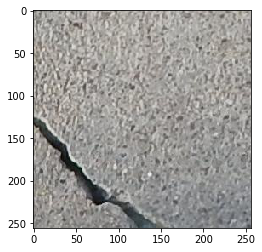

In [0]:
img = plt.imread(f'{PATH}/valid/crack/{files[0]}')
plt.imshow(img);

Here is how the raw data looks like

In [0]:
img.shape

(256, 256, 3)

In [0]:
img[:4,:4]

array([[[157, 156, 151],
        [126, 125, 120],
        [111, 110, 105],
        [122, 121, 116]],

       [[139, 138, 133],
        [122, 121, 116],
        [117, 116, 111],
        [126, 125, 120]],

       [[136, 135, 130],
        [135, 134, 129],
        [140, 139, 134],
        [147, 146, 141]],

       [[155, 154, 149],
        [157, 156, 151],
        [162, 161, 156],
        [164, 163, 158]]], dtype=uint8)

## Our first model: quick start

We're going to use a <b>pre-trained</b> model, that is, a model created by some one else to solve a different problem. Instead of building a model from scratch to solve a similar problem, we'll use a model trained on ImageNet (1.2 million images and 1000 classes) as a starting point. The model is a Convolutional Neural Network (CNN), a type of Neural Network that builds state-of-the-art models for computer vision. We'll be learning all about CNNs during this course.

We will be using the <b>resnet34</b> model. resnet34 is a version of the model that won the 2015 ImageNet competition. Here is more info on [resnet models](https://github.com/KaimingHe/deep-residual-networks). We'll be studying them in depth later, but for now we'll focus on using them effectively.

Here's how to train and evalulate a crack vs nocrack model in 3 lines of code, and under 20 seconds:

In [0]:
# Uncomment the below if you need to reset your precomputed activations
!rm -rf {PATH}tmp

Execute below given code only when we need to load the already trained model

In [0]:
shutil.move("/content/224_all.h5", "/content/MODEL/C_C_I_F_C/models") 

'/content/MODEL/C_C_I_F_C/models/224_all.h5'

Run below writtern code only when training the model for the first time otherwise jump to next cell


In [0]:
data = ImageDataBunch.from_folder(PATH)

In [0]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 66549854.68it/s]


In [0]:
learn.fit(2)

epoch,train_loss,valid_loss,accuracy,time
1,0.210221,0.228352,0.925984,03:10
2,0.174024,0.233761,0.928482,03:11


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
1,0.174319,0.244228,0.925359,03:09
2,0.170922,0.246190,0.922548,03:10
3,0.154419,0.245215,0.924032,03:09
4,0.130850,0.254429,0.924344,03:10


In [0]:
learn.save('34stage-1')

### **Loading and running the already trained model, you need to move the pretrained model file in the 'models' folder**

In [0]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=False)
learn.load('224_all')

## Results: looking at pictures

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (ie those with highest probability that are correct)
4. The most incorrect labels of each class (ie those with highest probability that are incorrect)
5. The most uncertain labels (ie those with probability closest to 0.5).

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

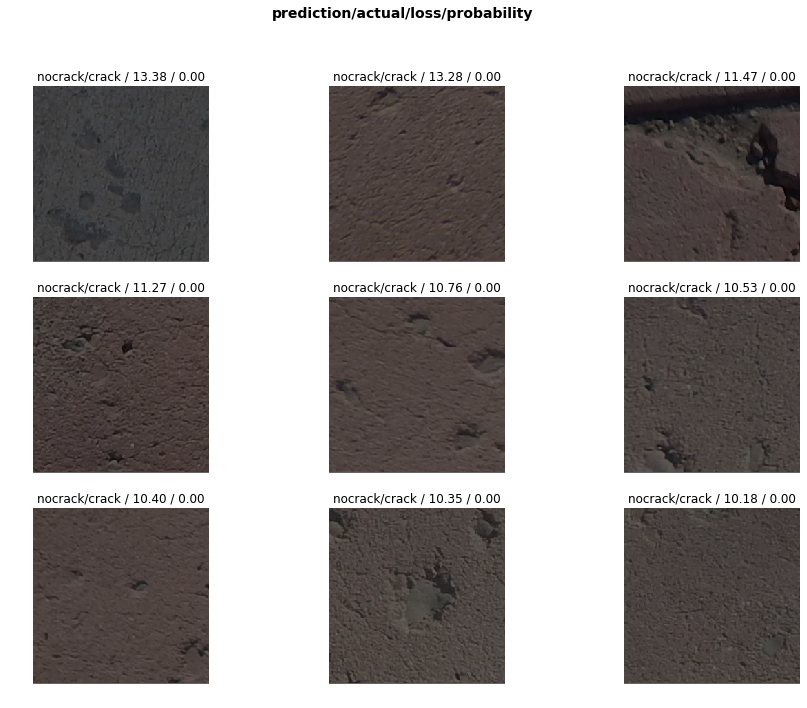

In [0]:
interp.plot_top_losses(9,figsize = (15,11))

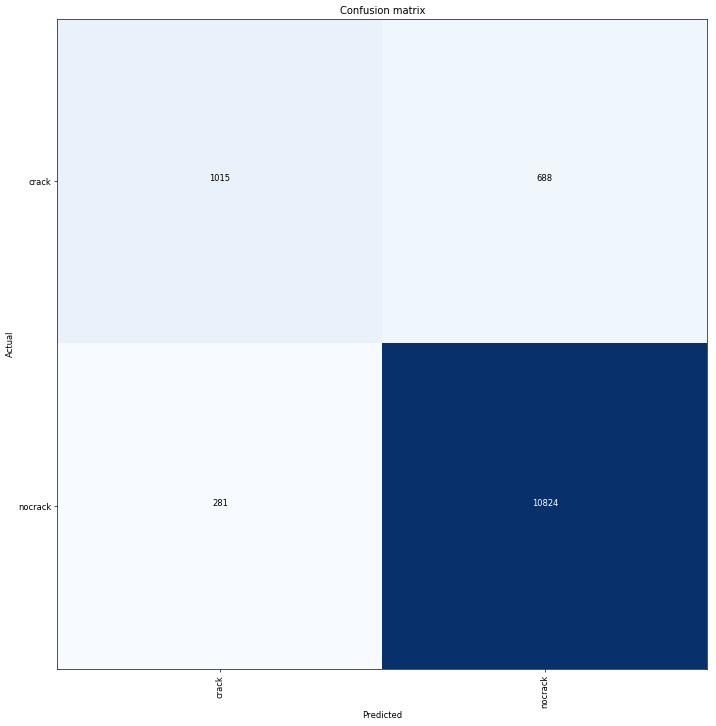

In [0]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [0]:
interp.most_confused(min_val=2)

[('crack', 'nocrack', 688), ('nocrack', 'crack', 281)]

**UNFREEZING , FINE TUNING AND LEARNING RATES**

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
1,0.168982,0.230369,0.932776,04:20


In [0]:
learn.load ('34stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (37542 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
nocrack,nocrack,nocrack,nocrack,nocrack
Path: /content/MODEL/SDNET2018;

Valid: LabelList (12808 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
nocrack,nocrack,nocrack,nocrack,nocrack
Path: /content/MODEL/SDNET2018;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


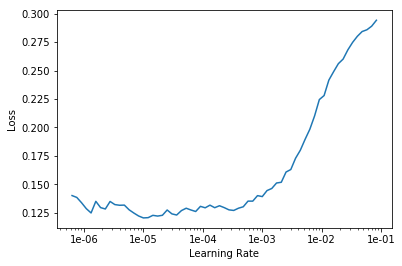

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
1,0.122112,0.249252,0.933557,04:21
2,0.109400,0.248256,0.932308,04:20


In [0]:
learn.save('34stage-2')

### Fine-tuning and differential learning rate annealing

Now that we have a good final layer trained, we can try fine-tuning the other layers. To tell the learner that we want to unfreeze the remaining layers, just call (surprise surprise!) `unfreeze()`.

In [0]:
learn.unfreeze()

Note that the other layers have *already* been trained to recognize imagenet photos (whereas our final layers where randomly initialized), so we want to be careful of not destroying the carefully tuned weights that are already there.

Generally speaking, the earlier layers (as we've seen) have more general-purpose features. Therefore we would expect them to need less fine-tuning for new datasets. For this reason we will use different learning rates for different layers: the first few layers will be at 1e-4, the middle layers at 1e-3, and our FC layers we'll leave at 1e-2 as before. We refer to this as *differential learning rates*, although there's no standard name for this techique in the literature that we're aware of.

In [0]:
lr=np.array([1e-4,1e-3,1e-2])

In [0]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.256501   0.225038   0.924891  
    1      0.232543   0.21947    0.927623  
    2      0.213994   0.221      0.925828  
    3      0.206306   0.226576   0.927623  
    4      0.193588   0.217573   0.929888  
    5      0.188697   0.216638   0.928873  
    6      0.191012   0.218147   0.92856   


[array([0.21815]), 0.9285602748282323]

Another trick we've used here is adding the `cycle_mult` parameter. Take a look at the following chart, and see if you can figure out what the parameter is doing:

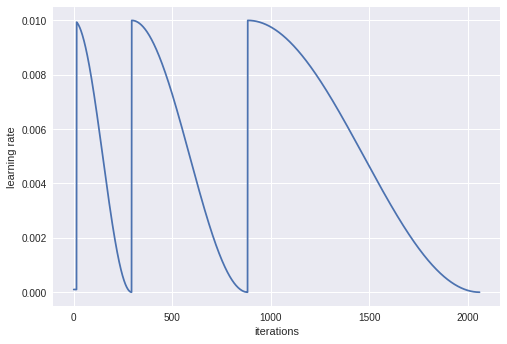

In [0]:
learn.sched.plot_lr()

Note that's what being plotted above is the learning rate of the *final layers*. The learning rates of the earlier layers are fixed at the same multiples of the final layer rates as we initially requested (i.e. the first layers have 100x smaller, and middle layers 10x smaller learning rates, since we set `lr=np.array([1e-4,1e-3,1e-2])`.

In [0]:
learn.save('224_sdnet_all')

In [0]:
learn.load('224_sdnet_all')

There is something else we can do with data augmentation: use it at *inference* time (also known as *test* time). Not surprisingly, this is known as *test time augmentation*, or just *TTA*.

TTA simply makes predictions not just on the images in your validation set, but also makes predictions on a number of randomly augmented versions of them too (by default, it uses the original image along with 4 randomly augmented versions). It then takes the average prediction from these images, and uses that. To use TTA on the validation set, we can use the learner's `TTA()` method.

In [0]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [0]:
accuracy_np(probs, y)

0.9322298563397876

I generally see about a 10-20% reduction in error on this dataset when using TTA at this point, which is an amazing result for such a quick and easy technique!

## Analyzing results

### Confusion matrix 

In [0]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

A common way to analyze the result of a classification model is to use a [confusion matrix](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/). Scikit-learn has a convenient function we can use for this purpose:

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

We can just print out the confusion matrix, or we can show a graphical view (which is mainly useful for dependents with a larger number of categories).

[[ 1017   686]
 [  182 10923]]


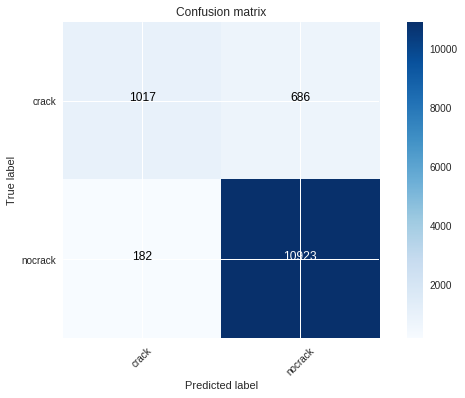

In [0]:
plot_confusion_matrix(cm, data.classes)

### Looking at pictures again

Most incorrect crack


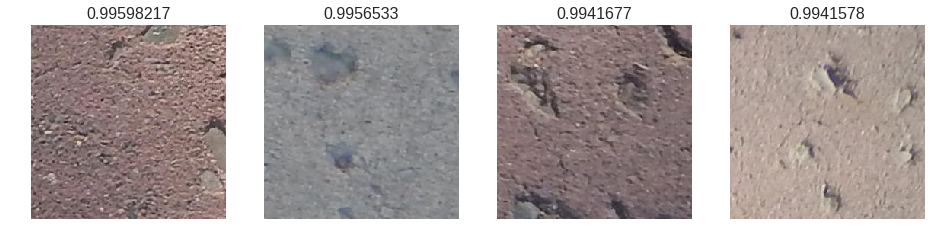

In [0]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect crack")

Most incorrect nocrack


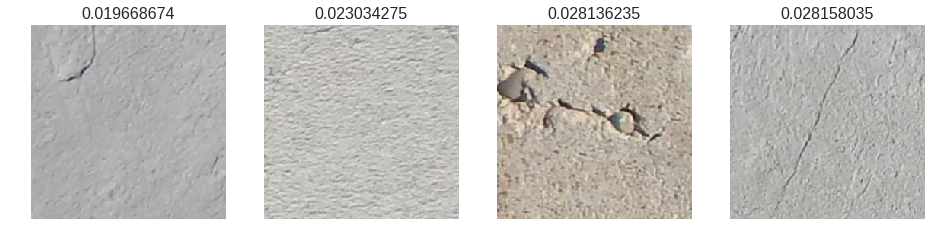

In [0]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect nocrack")

## Review: easy steps to train a world-class image classifier

1. Enable data augmentation, and precompute=True
1. Use `lr_find()` to find highest learning rate where loss is still clearly improving
1. Train last layer from precomputed activations for 1-2 epochs
1. Train last layer with data augmentation (i.e. precompute=False) for 2-3 epochs with cycle_len=1
1. Unfreeze all layers
1. Set earlier layers to 3x-10x lower learning rate than next higher layer
1. Use `lr_find()` again
1. Train full network with cycle_mult=2 until over-fitting

## Understanding the code for our first model

Let's look at the Dogs v Cats code line by line.

**tfms** stands for *transformations*. `tfms_from_model` takes care of resizing, image cropping, initial normalization (creating data with (mean,stdev) of (0,1)), and more.

In [0]:
tfms = tfms_from_model(resnet34, sz)

We need a <b>path</b> that points to the dataset. In this path we will also store temporary data and final results. `ImageClassifierData.from_paths` reads data from a provided path and creates a dataset ready for training.

In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)

`ConvLearner.pretrained` builds *learner* that contains a pre-trained model. The last layer of the model needs to be replaced with the layer of the right dimensions. The pretained model was trained for 1000 classes therfore the final layer predicts a vector of 1000 probabilities. The model for cats and dogs needs to output a two dimensional vector. The diagram below shows in an example how this was done in one of the earliest successful CNNs. The layer "FC8" here would get replaced with a new layer with 2 outputs.

<img src="images/pretrained.png" width="500">
[original image](https://image.slidesharecdn.com/practicaldeeplearning-160329181459/95/practical-deep-learning-16-638.jpg)

In [0]:
learn = ConvLearner.pretrained(resnet34, data, precompute=True)

*Parameters*  are learned by fitting a model to the data. *Hyparameters* are another kind of parameter, that cannot be directly learned from the regular training process. These parameters express “higher-level” properties of the model such as its complexity or how fast it should learn. Two examples of hyperparameters are the *learning rate* and the *number of epochs*.

During iterative training of a neural network, a *batch* or *mini-batch* is a subset of training samples used in one iteration of Stochastic Gradient Descent (SGD). An *epoch* is a single pass through the entire training set which consists of multiple iterations of SGD.

We can now *fit* the model; that is, use *gradient descent* to find the best parameters for the fully connected layer we added, that can separate cat pictures from dog pictures. We need to pass two hyperameters: the *learning rate* (generally 1e-2 or 1e-3 is a good starting point, we'll look more at this next) and the *number of epochs* (you can pass in a higher number and just stop training when you see it's no longer improving, then re-run it with the number of epochs you found works well.)

In [0]:
learn.fit(1e-2, 1)

## Analyzing results: loss and accuracy

When we run `learn.fit` we print 3 performance values (see above.) Here 0.03 is the value of the **loss** in the training set, 0.0226 is the value of the loss in the validation set and 0.9927 is the validation accuracy. What is the loss? What is accuracy? Why not to just show accuracy?

**Accuracy** is the ratio of correct prediction to the total number of predictions.

In machine learning the **loss** function or cost function is representing the price paid for inaccuracy of predictions.

The loss associated with one example in binary classification is given by:
`-(y * log(p) + (1-y) * log (1-p))`
where `y` is the true label of `x` and `p` is the probability predicted by our model that the label is 1.

In [0]:
def binary_loss(y, p):
    return np.mean(-(y * np.log(p) + (1-y)*np.log(1-p)))

In [0]:
acts = np.array([1, 0, 0, 1])
preds = np.array([0.9, 0.1, 0.2, 0.8])
binary_loss(acts, preds)

0.164252033486018

Note that in our toy example above our accuracy is 100% and our loss is 0.16. Compare that to a loss of 0.03 that we are getting while predicting crack and nocrack. Exercise: play with `preds` to get a lower loss for this example. 

**Example:** Here is an example on how to compute the loss for one example of binary classification problem. Suppose for an image x with label 1 and your model gives it a prediction of 0.9. For this case the loss should be small because our model is predicting a label $1$ with high probability.

`loss = -log(0.9) = 0.10`

Now suppose x has label 0 but our model is predicting 0.9. In this case our loss is should be much larger.

loss = -log(1-0.9) = 2.30

- Exercise: look at the other cases and convince yourself that this make sense.
- Exercise: how would you rewrite `binary_loss` using `if` instead of `*` and `+`?

Why not just maximize accuracy? The binary classification loss is an easier function to optimize.

***Now , testing this trained model on test dataset***

In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz), test_name='test')



In [0]:
log_preds_test = learn.predict(is_test=False)


In [0]:
testprobs = np.exp(log_preds_test[:,1])
testprobs

array([0.00678, 0.00028, 0.01711, ..., 0.99454, 0.97375, 0.98133], dtype=float32)

In [0]:
np.mean(testprobs)

0.85670805

In [0]:
uploaded = drive.CreateFile({'title': '224_all.h5'})
uploaded.SetContentFile('224_all.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))